# TSF - Task 2

# Diksha Singh

# Problem Statement

From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 

# Reading and Understanding data

In [107]:
#import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("always")

In [108]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [109]:
# Reading the csv file
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
iris.shape

(150, 6)

In [111]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [112]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [114]:
iris.drop("Id",axis=1, inplace=True)

### Pairplot

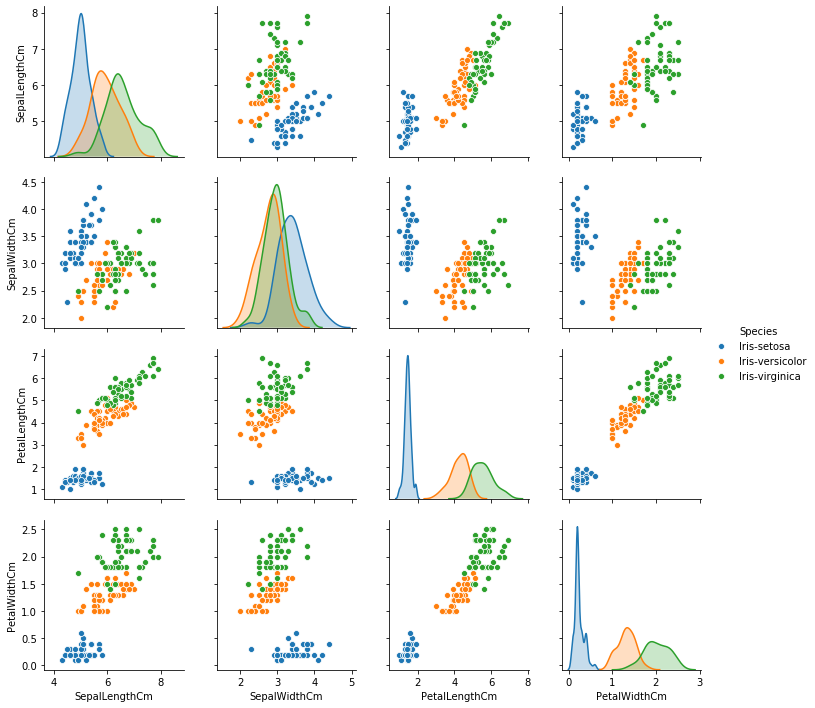

In [115]:
sns.pairplot(iris,diag_kind="kde",hue="Species")
plt.show()

### distplot

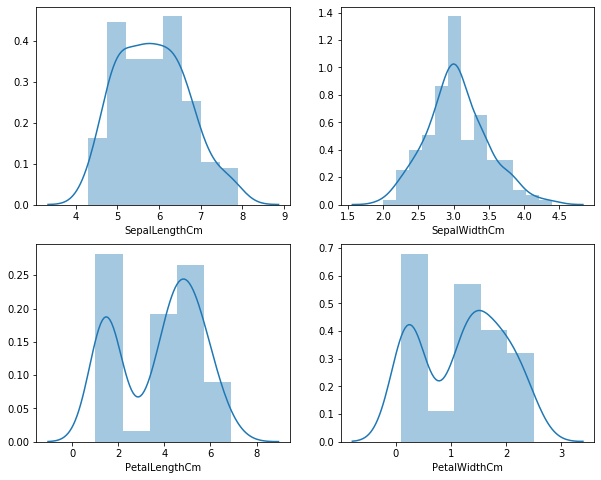

In [116]:
# ploting the distplot
plt.figure(figsize = (10,8))
features = iris.columns[:-1]
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(iris[i[1]])

### Boxplot

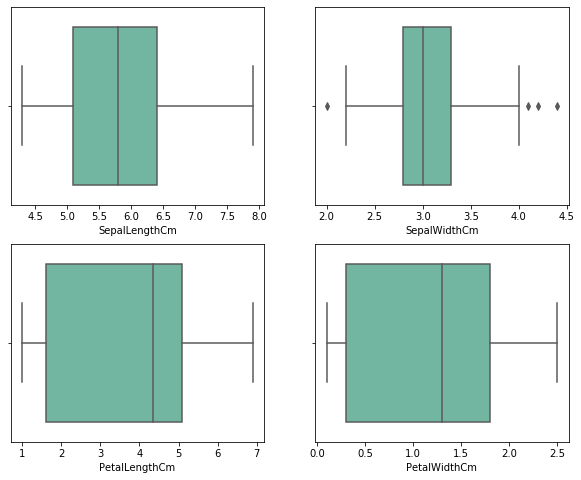

In [117]:
#plotting boxplots
plt.figure(figsize = (10,8))
features = iris.columns[:-1]
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(iris[i[1]],palette="Set2")

SepaWidth has some outliers so we will cap the ouliers

### Heatmap

C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Users\MAhaDev\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


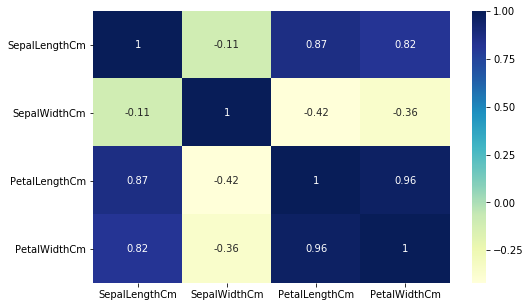

In [118]:
plt.figure(figsize=(8,5))
ax=sns.heatmap(iris[iris.columns].corr(),annot=True,cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.yticks(rotation=0)
plt.show()

### Outlier treatment

In [119]:
q1=iris['SepalWidthCm'].quantile(0.01)
iris['SepalWidthCm'][iris['SepalWidthCm']<=q1] = q1
q2=iris['SepalWidthCm'].quantile(0.99)
iris['SepalWidthCm'][iris['SepalWidthCm']>=q2] = q2

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Hopkins Score

In [120]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [121]:
hopkins(iris.drop('Species',axis = 1))

0.8537134669409016

In [122]:
#dropping 'Species' to analyse the data.
iris_new=iris.drop('Species',axis=1)

# Rescaling

In [123]:
#scaling
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_new)
iris_scaled.shape

(150, 4)

In [124]:
#converting to Dataframe.
iris_scaled=pd.DataFrame(iris_scaled)
iris_scaled.columns=iris_new.columns
iris_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


### silhouette score

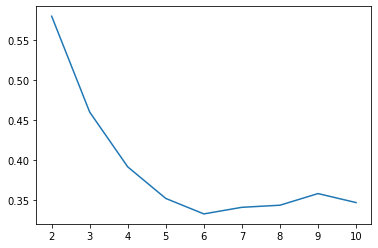

In [125]:
# calculting the silouette score
ssd=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k)  
    kmeans.fit(iris_scaled)      #fit the scaled data
    ssd.append([k,silhouette_score(iris_scaled,kmeans.labels_)])  #kmeans.labels_
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1]) #plotting the curve

We can see that optimal k=3.

### Elbow curve

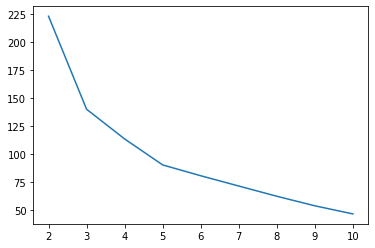

In [126]:
# plotting Elbow curve
ssd = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(iris_scaled)   
    ssd.append([k, kmeans.inertia_]) # kmeans.inertia_
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])#plotting the curve

From Elbow curve also we can see that optimal k=3.

In [127]:
# with k=3 making the the model
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(iris_scaled)

KMeans(n_clusters=3, random_state=100)

In [128]:
iris['cluster_id']=kmeans.labels_
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [129]:
iris.cluster_id.value_counts()

2    53
0    50
1    47
Name: cluster_id, dtype: int64

So our clusters are distributed like this.

<Figure size 1440x720 with 0 Axes>

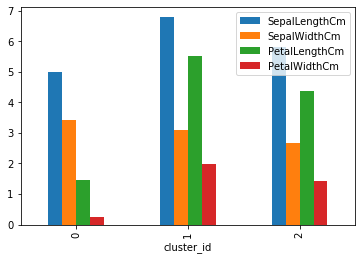

In [130]:
plt.figure(figsize = (20,10))
iris.drop(['Species'],axis=1).groupby('cluster_id').mean().plot(kind='bar')
plt.show()

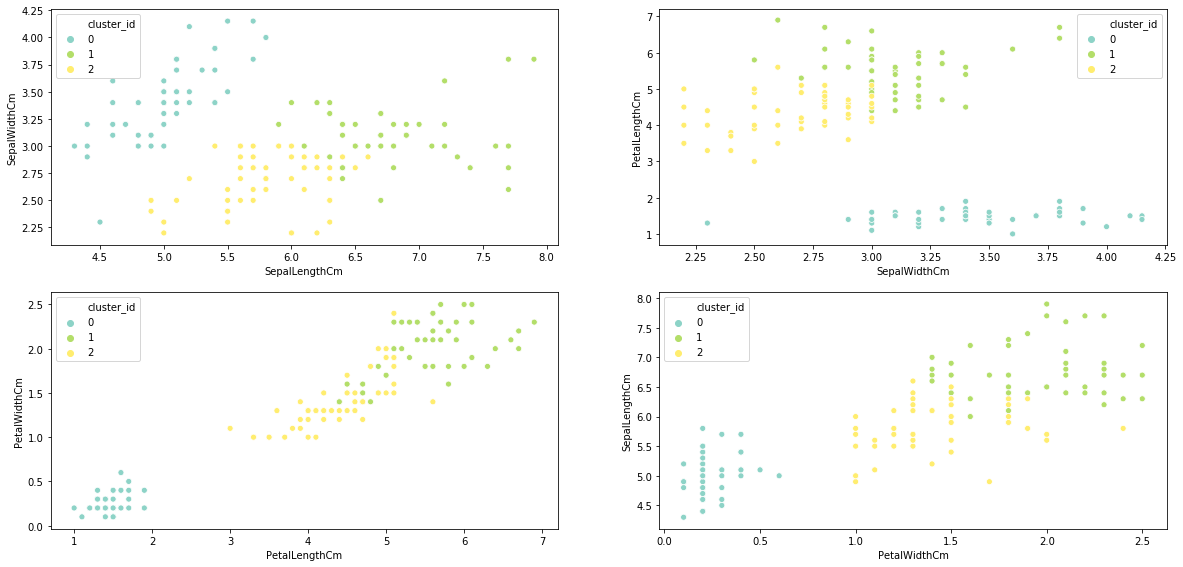

In [131]:
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'cluster_id', data = iris, palette = 'Set3')

plt.subplot(4,2,2)
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalLengthCm', hue = 'cluster_id', data = iris, palette = 'Set3')

plt.subplot(4,2,3)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'cluster_id', data = iris, palette = 'Set3')

plt.subplot(4,2,4)
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalLengthCm', hue = 'cluster_id', data = iris, palette = 'Set3')

### Thank you For Reading 